## Convolución 2D (Filtrado)

De similar manera que los filtros de convolución aplicados a señales 1D en forma de filtros pasa alto, pasa bajo, etc. En 2D se pueden aplicar filtros pasa bajo para remover ruido o difuminar la imágen, y los pasa alto para resaltar bordes.

En OpenCV se cuenta con la función `filter2D()` que realiza la operación de convolución entre un kernel o filtro con una imagen. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]    # incrementar tamaño de plots

img = cv2.imread("lenna.png")

# Kernel normalizado
kernel = np.ones((5, 5), np.float32) / 25

def display2(img1, img2):
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title("Filtrada")
    plt.xticks([])
    plt.yticks([])

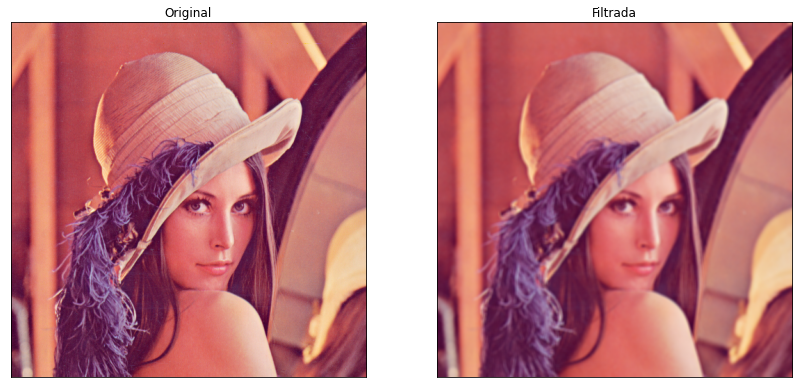

In [2]:
display2(img, cv2.filter2D(img, -1, kernel))

En el caso anterior, el kernel realiza una operación de promediado de pixeles para difuminar la imagen.

### Difuminado (Blurring)
El difuminado o suavizado de una imagen se logra realizando la convolución entre una imagen y un kernel o filtro pasa-bajo. Existen distintas técnicas o tipos de kernels usados para esta tarea.

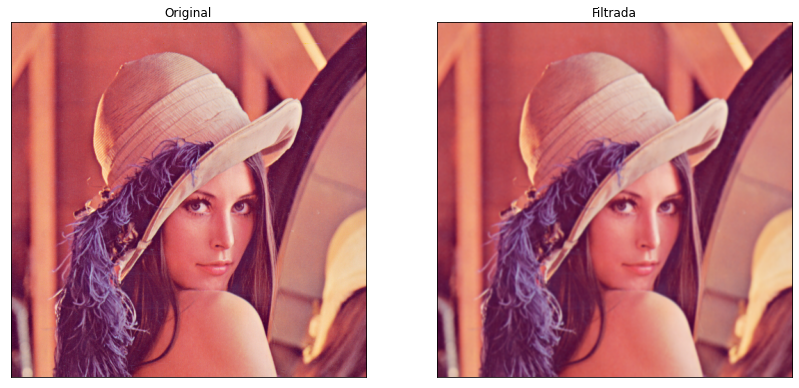

In [3]:
# filtro gaussiano

display2(img, cv2.GaussianBlur(img, (5, 5), 0))

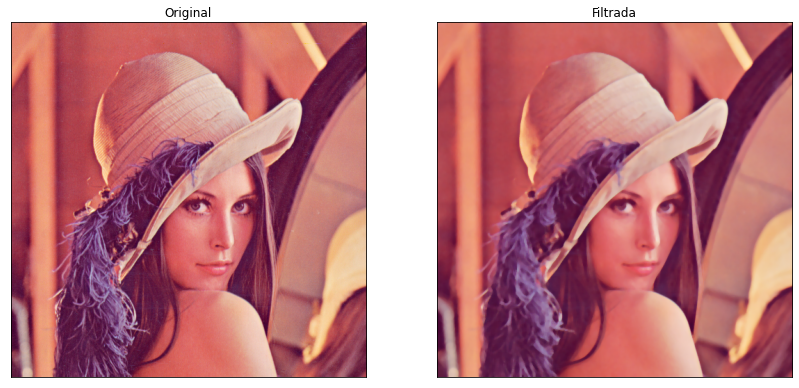

In [4]:
# filtro mediana

display2(img, cv2.medianBlur(img, 5))

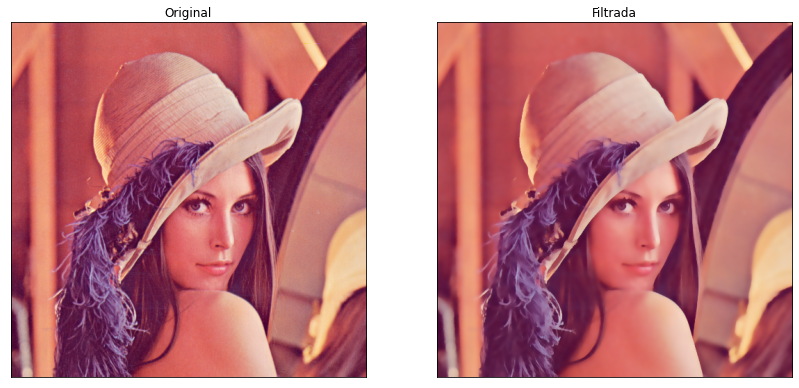

In [5]:
# filtro bilateral

display2(img, cv2.bilateralFilter(img, 9, 75, 75))

## Detección de bordes usando filtros
Se puede definir kernels que resalten el cambio de intensidad en una imagen, este cambio de intensidad es elevado en los puntos donde se presentan bordes, por tanto, se puede construir una imagen con bordes resaltados a partir de una convolución.

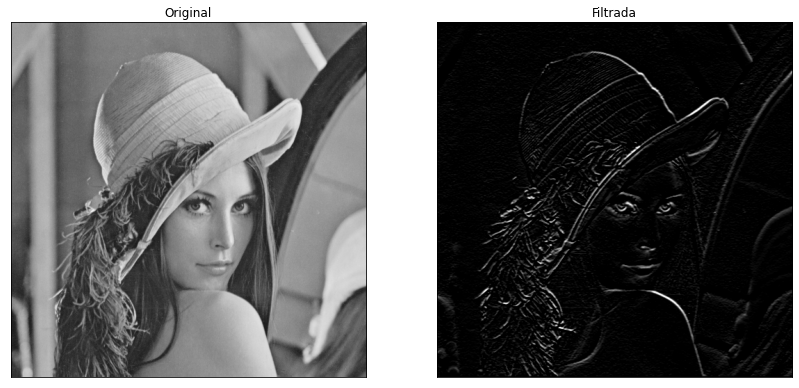

In [7]:
# gradiente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# bordes horizontales
kernel = np.array(
    [[-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]]
)

display2(img_gray, cv2.filter2D(img_gray, -1, kernel))

## Gradientes
Sin embargo, OpenCV cuenta con funciones específicas para hallar gradientes en la imagen.

  - Filtro de Sobel: resulta de una combinación entre un filtro gaussiano y una operación de diferenciación.
  - Filtro laplaciano: Calcula el laplaciano de la imagen según la fórmula: $\Delta img = \frac{\partial^2 img}{\partial x^2} + \frac{\partial^2 img}{\partial y^2}$
  

In [8]:
def display_gray(img1, img2):
    plt.subplot(121)
    plt.imshow(img1, cmap="gray")
    plt.title("Original")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img2, cmap="gray")
    plt.title("Filtrada")
    plt.xticks([])
    plt.yticks([])

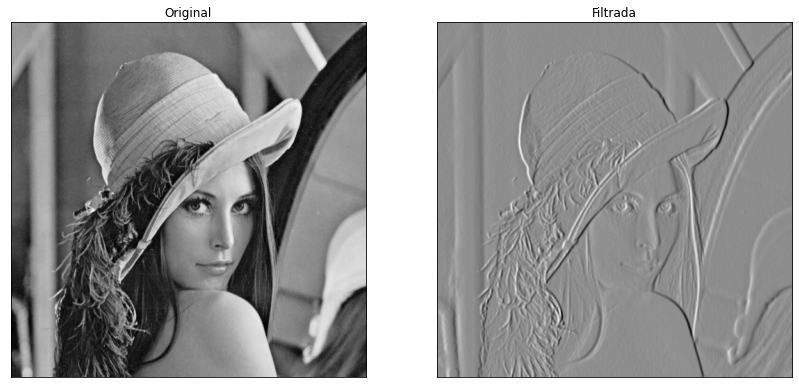

In [9]:

# Filtro de sobel sobre eje x
display_gray(img_gray, cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5))

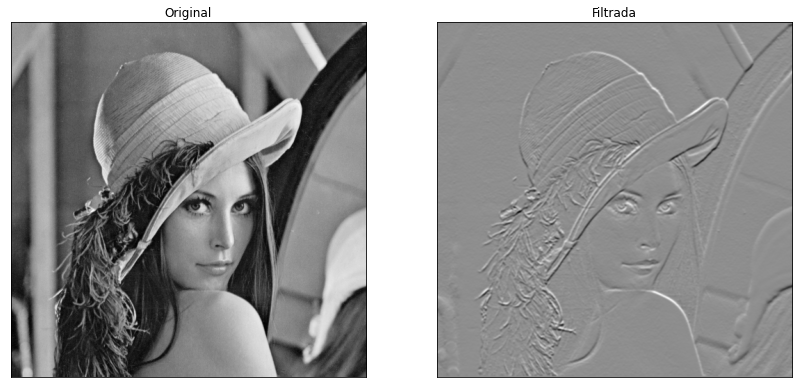

In [10]:
# Filtro de sobel sobre eje y
display_gray(img_gray, cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5))

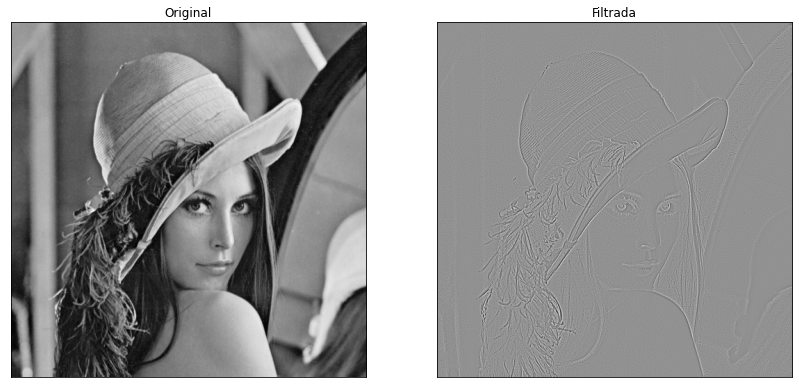

In [11]:
# filtro laplaciano
display_gray(img_gray, cv2.Laplacian(img_gray, cv2.CV_64F))

## Filtro de Canny
Sin embargo, si se desea encontrar los bordes presentes en una imagen, existe un algoritmo bastante conocido para realizar esa tarea, el algoritmo de Canny. OpenCV cuenta con una implementación optimizada.

El algoritmo de Canny cuenta con varios pasos secuenciales para poder hallar y resaltar los bordes de una imagen:

  1. Reducción de ruido
  2. Cálculo de la intensidad de la gradiente
  3. Supresión de no máximos
  4. Umbrales por histéresis
  

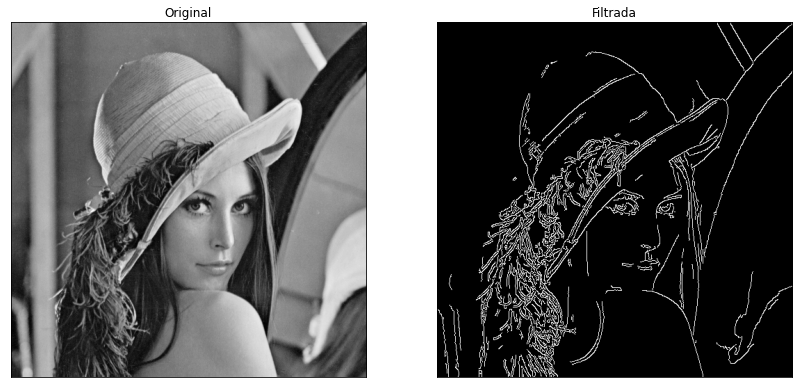

In [12]:
display_gray(img_gray, cv2.Canny(img_gray, 100, 200))